# Chan-Vese Segmentation for Brain images

The Chan-Vese segmentation algorithm is designed to segment objects without clearly defined boundaries. This algorithm is based on level sets that are evolved iteratively to minimize an energy, which is defined by weighted values corresponding to the sum of differences intensity from the average value outside the segmented region, the sum of differences from the average value inside the segmented region, and a term which is dependent on the length of the boundary of the segmented region.

In this example, we try to segment a 2d input images for time saving purposes.

In [2]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib as mpl    
import matplotlib.ticker as ticker
import numpy as np
import math
from scipy.stats import norm
# for display
sub_size = 16
sup_size=20
if_plot = False

Load the input Image

In [3]:
dataFile = '../Data/brain.nii.gz'
maskFile = '../Data/brain_mask.nii'# Mask file, if any
brainImage = nib.load(dataFile).get_fdata()
maskImage = nib.load(maskFile).get_fdata()

slices = brainImage.shape[0]//2
img_slice = brainImage[slices]
seg_slice = maskImage[slices]

Visualize the data in axial, coronal and sagittal view.
Feel free to change the value of the array slices to see the different slices in axial, coronal and sagittal view.

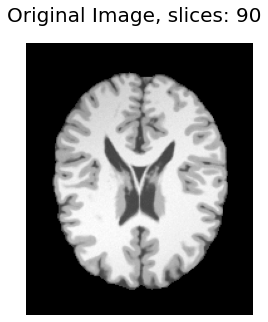

In [4]:
def plotOriginalImage(image, slices, title):
    fig = plt.figure(figsize=(5,5))
    fig.suptitle(title+', slices: ' + str(slices), fontsize=sup_size)
    plt.imshow(image, cmap='gray'); plt.axis('off')
    plt.show()

plotOriginalImage(img_slice, slices, title='Original Image')

In [5]:
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese

# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(img_slice, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)

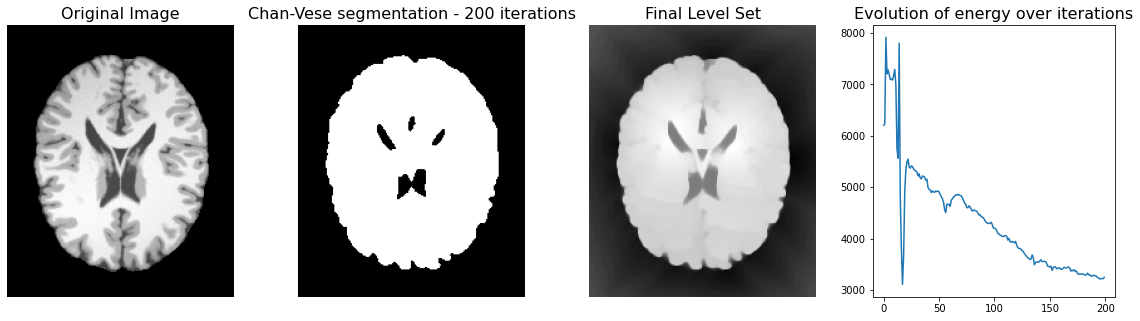

In [7]:
# Plot results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

ax1.imshow(img_slice, cmap='gray'); ax1.axis('off'); ax1.set_title('Original Image', fontsize=sub_size)
ax2.imshow(cv[0], cmap='gray'); ax2.axis('off'); ax2.set_title(f'Chan-Vese segmentation - {len(cv[2])} iterations', fontsize=sub_size)
ax3.imshow(cv[1], cmap='gray'); ax3.axis('off'); ax3.set_title('Final Level Set', fontsize=sub_size)
ax4.plot(cv[2]); ax1.axis('off'); ax4.set_title('Evolution of energy over iterations', fontsize=sub_size)
plt.show()